In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Read in the housing dataset.
data = pd.read_csv("train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
from model import data_encoder

# Encode the categorical variables in the dataset.
data = data_encoder(data)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


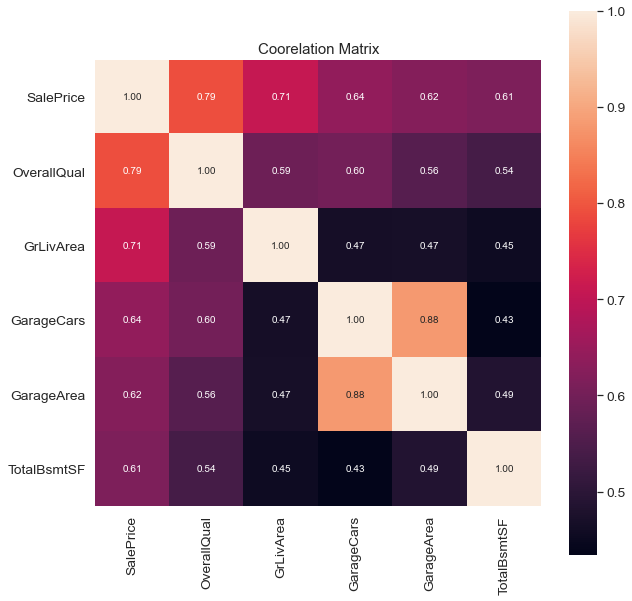

In [4]:
import seaborn as sns

# Create a correlation matrix of the 5 variables most correlated with SalePrice.
corrmat = data.corr()
columns = corrmat.nlargest(6, 'SalePrice')['SalePrice'].index
corr = np.corrcoef(data[columns].values.T)

# Plot the correlation matrix.
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
heat_map = sns.heatmap(corr, cbar=True, annot=True, square=True,
                       fmt='.2f', annot_kws={'size': 10},
                       yticklabels=columns.values,
                       xticklabels=columns.values).set_title("Coorelation Matrix")
plt.show()

In [5]:
from model import Model, PolynomialRegression

# Remove GarageArea to reduce collinearity
X = data[columns].drop(['SalePrice', 'GarageArea'], axis = 1) 
y = data['SalePrice']

# Create linear regression model (first degree)
lr = Model(PolynomialRegression(degree=1), X, y, "linreg")

In [6]:
print(lr)

This is a linreg model which predicts SalePrice using the following predictors: OverallQual, GrLivArea, GarageCars, TotalBsmtSF.


In [7]:
lr.score()

0.7697240562976759

In [8]:
lr.cv_score()

0.7542594996744768

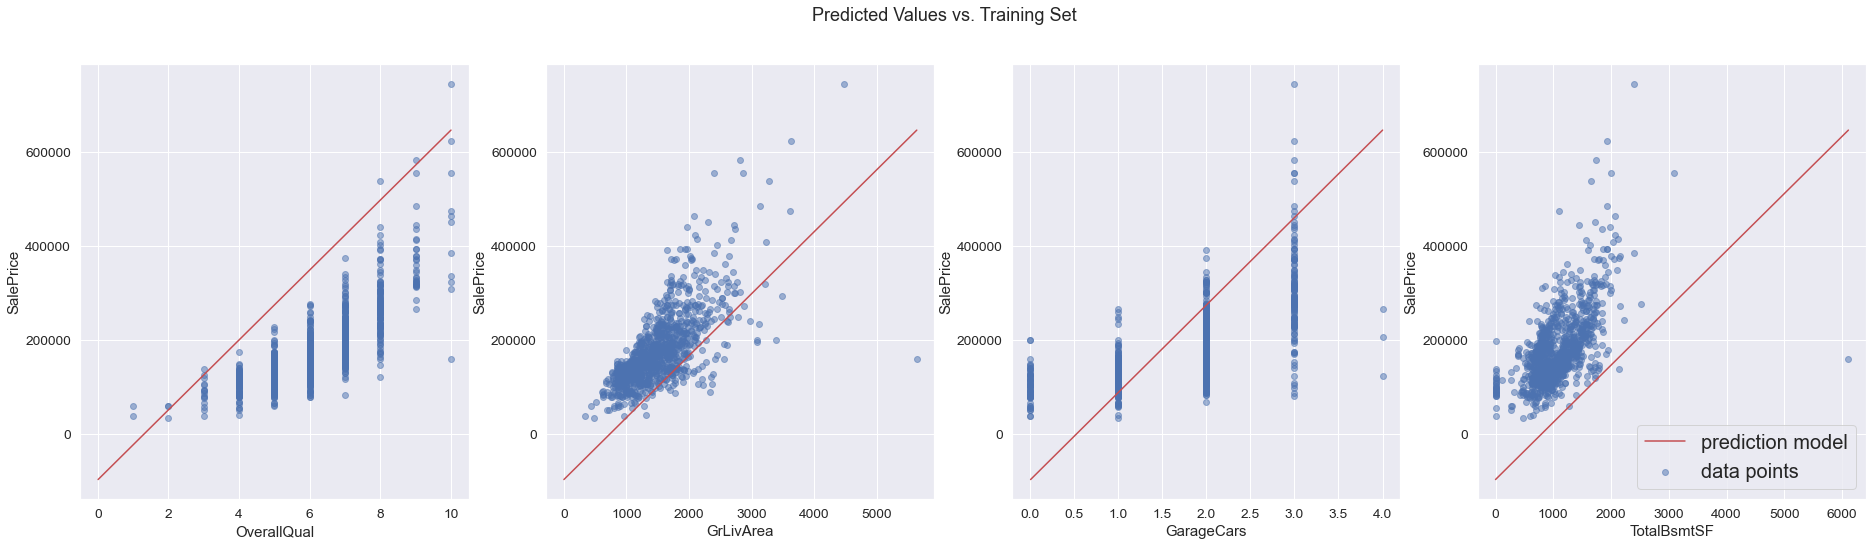

In [9]:
lr.plot()

In [10]:
# Create second degree polynomial regression model
pr = Model(PolynomialRegression(degree=2), X, y, "polyreg")

In [11]:
print(pr)

This is a polyreg model which predicts SalePrice using the following predictors: OverallQual, GrLivArea, GarageCars, TotalBsmtSF.


In [12]:
pr.score()

0.8328598602999984

In [13]:
pr.cv_score()

0.8257337208115286

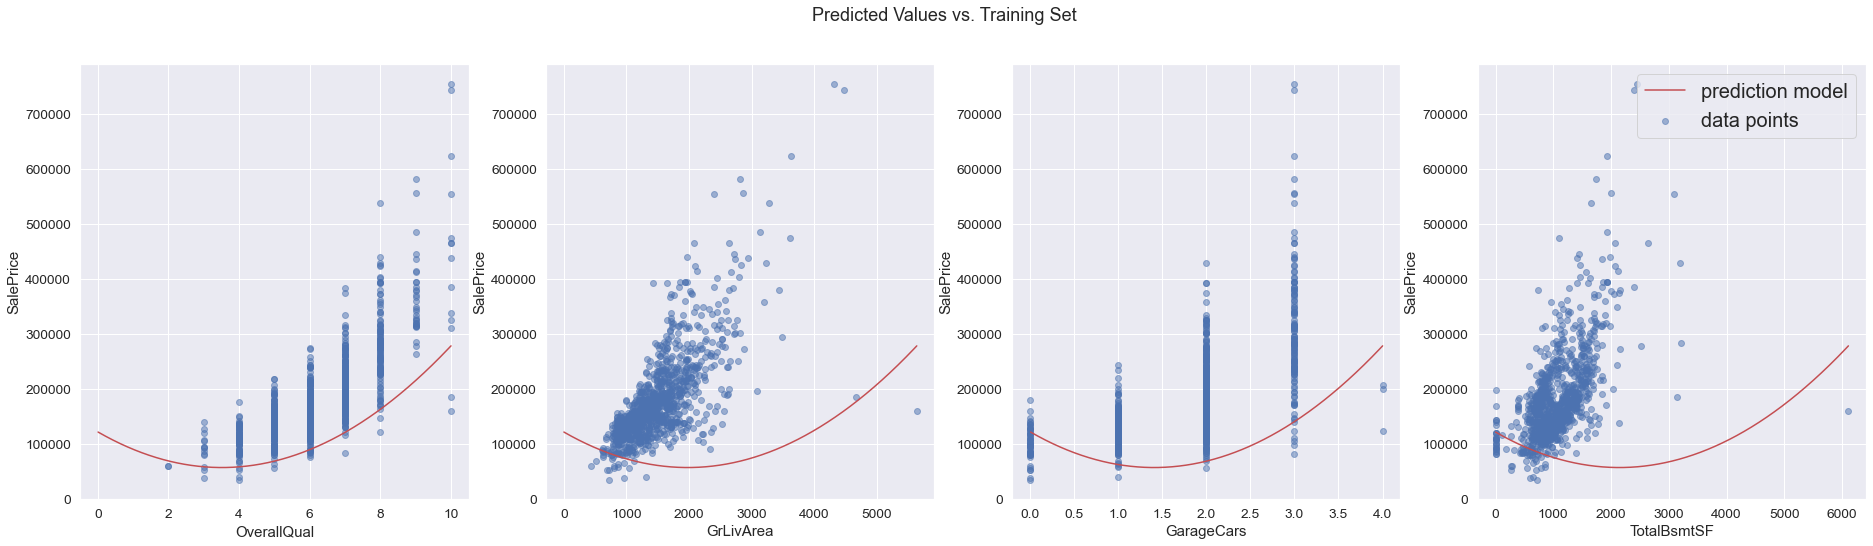

In [14]:
pr.plot()

In [15]:
# Test exception handling for input of a model.
m = Model(1, X, y, "int")

TypeError: Input model must be of type sklearn.pipeline.Pipeline.

In [ ]:
# Test exception handling for input of a target vector.
m = Model(PolynomialRegression(degree=2), X, X, "polyreg")